In [79]:
# Essas duas linhas recarregam o arquivo do módulo "funcoes_modelo_de_limiares.py" #
import funcoes_modelo_de_limiares as lim
import imp
#imp.find_module(funcoes_modelo_de_limiares)
#imp.reload(funcoes_modelo_de_limiares)

###########################################################################################################################################

import numpy as np
import matplotlib.pyplot as plt
import random as rd
from IPython.display import clear_output

import funcoes_modelo_de_limiares as lim

In [131]:
a = set()
a.add(3)
a.add('batata')
a.add(1)
a.remove(1)

a

{3, 'batata'}

In [119]:
class Sistema:
    
    def __init__(self, agentes0, agentes1):
        self.place0_size = len(agentes0)
        self.place0 = agentes0
        self.place1_size = len(agentes1)
        self.place1 = agentes1
        
    def migrate(self, placeA, i):
        a = False
        if placeA == 0:
            agente = self.place0[i]
            self.place0 = np.delete(self.place0, i)
            self.place0_size -= 1
            self.place1 = np.append(self.place1, agente)
            self.place1_size += 1
            if agente.state == 1:
                a = True
        else:
            agente = self.place1[i]
            self.place1 = np.delete(self.place1, i)
            self.place1_size -= 1
            self.place0 = np.append(self.place0, agente)
            self.place0_size += 1
            if agente.state == 1:
                a = True
            
        return 

In [120]:
def simula_greve_setores_migracao(N, sistema, passos = 50, probabilidade_de_migracao = 0.2):
    
    tamanho_da_greve = np.array([0,0])
    progressao = np.zeros((2,passos))              # array que acumula a evolução temporal da greve
    aux0 = 0
    aux1 = 0
    migracao = 0
    
    for i in range(passos):
        for j in range(sistema.place0_size):
            sistema.place0[j].update_state(tamanho_da_greve[0]/sistema.place0_size)
            if sistema.place0[j].state == 1:
                aux0 += 1
                
        for j in range(sistema.place1_size):       
            sistema.place1[j].update_state(tamanho_da_greve[1]/sistema.place1_size)
            if sistema.place1[j].state == 1:
                aux1 += 1
                
        tamanho_da_greve[0] = aux0
        tamanho_da_greve[1] = aux1
        progressao[0][i] = tamanho_da_greve[0]
        progressao[1][i] = tamanho_da_greve[1]
        aux0 = 0
        aux1 = 0
        
        prob = rd.random()
        
        if prob <= probabilidade_de_migracao:
            migracao += 1
            setor = rd.randint(0,1)
            if setor == 0:
                num_agente = rd.randint(0,sistema.place0_size-1)
            else:
                num_agente = rd.randint(0,sistema.place1_size-1)
            
            sistema.migrate(setor, num_agente)
    print(migracao)
            
    return [progressao, tamanho_da_greve]

In [138]:
def simula_greve_setores_migracao_individual(N, sistema, passos = 50, probabilidade_de_migracao_individual = 0.01):
    
    tamanho_da_greve = np.array([0,0])
    progressao = np.zeros((2,passos))              # array que acumula a evolução temporal da greve
    aux0 = 0
    aux1 = 0
    migracao = 0
    
    for i in range(passos):
        j = 0
        while j < sistema.place0_size:
            try:
                sistema.place0[j].update_state(tamanho_da_greve[0]/sistema.place0_size)
                if sistema.place0[j].state == 1:
                    aux0 += 1

                prob = float(rd.random())

                if prob <= probabilidade_de_migracao_individual:
                    migracao += 1
                    a = sistema.migrate(0, j)
                    if a:
                        tamanho_da_greve[0] -= 1
                    j -= 1

                j += 1
            except:
                print('Error on', j)
                print(sistema.place0_size)
                print(len(sistema.place0))
                break

        j = 0        
        while j < sistema.place1_size:    
            
            sistema.place1[j].update_state(tamanho_da_greve[1]/sistema.place1_size)
            if sistema.place1[j].state == 1:
                aux1 += 1
                
            prob = float(rd.random())

            if prob <= probabilidade_de_migracao_individual:
                migracao += 1
                a = sistema.migrate(1, j)
                if a:
                    tamanho_da_greve[1] -= 1
                j -= 1
            
            j += 1
                
                
        tamanho_da_greve[0] = aux0
        tamanho_da_greve[1] = aux1
        progressao[0][i] = tamanho_da_greve[0]
        progressao[1][i] = tamanho_da_greve[1]
        aux0 = 0
        aux1 = 0
        
    print(migracao)
            
    return [progressao, tamanho_da_greve]

In [160]:
def simula_greve_setores_migracao_individual_2(N, sistema, passos = 50, prob1 = 0.01, prob2 = 0.02):
    
    tamanho_da_greve = np.array([0,0])
    progressao = np.zeros((2,passos))              # array que acumula a evolução temporal da greve
    aux0 = 0
    aux1 = 0
    migracao = 0
    
    for i in range(passos):
        j = 0
        while j < sistema.place0_size:
            sistema.place0[j].update_state(tamanho_da_greve[0]/sistema.place0_size)
            if sistema.place0[j].state == 1:
                aux0 += 1

            prob = float(rd.random())
            
            if tamanho_da_greve[0] > tamanho_da_greve[1]:
                probabilidade = prob1
            else:
                probabilidade = prob2
                
            if prob <= probabilidade:
                migracao += 1
                a = sistema.migrate(0, j)
                if a:
                    tamanho_da_greve[0] -= 1
                j -= 1

            j += 1

        j = 0        
        while j < sistema.place1_size:    
            
            sistema.place1[j].update_state(tamanho_da_greve[1]/sistema.place1_size)
            if sistema.place1[j].state == 1:
                aux1 += 1
                
            prob = float(rd.random())
            
            if tamanho_da_greve[1] > tamanho_da_greve[0]:
                probabilidade = prob1
            else:
                probabilidade = prob2

            if prob <= probabilidade:
                migracao += 1
                a = sistema.migrate(1, j)
                if a:
                    tamanho_da_greve[1] -= 1
                j -= 1
            
            j += 1
                
                
        tamanho_da_greve[0] = aux0
        tamanho_da_greve[1] = aux1
        progressao[0][i] = tamanho_da_greve[0]
        progressao[1][i] = tamanho_da_greve[1]
        aux0 = 0
        aux1 = 0
        
    print(migracao)
            
    return [progressao, tamanho_da_greve]

16


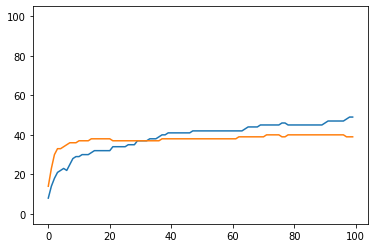

In [104]:
N = 100
media = 25
desvio_padrao = 40

agentes0 = lim.cria_agentes(N,media,desvio_padrao)
agentes1 = lim.cria_agentes(N,media,desvio_padrao)

sistema = Sistema(agentes0, agentes1)
migracao = 0.2

passos_temporais = 100

(progressao, tamanho_final) = simula_greve_setores_migracao(N, sistema, passos_temporais, migracao)

plt.figure()
plt.plot(progressao[0])
plt.plot(progressao[1])
plt.ylim(-5,105)
plt.show()

44534


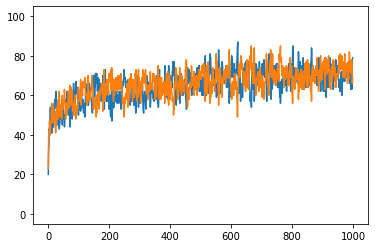

In [148]:
N = 100
media = 25
desvio_padrao = 40

agentes0 = lim.cria_agentes(N,media,desvio_padrao)
agentes1 = lim.cria_agentes(N,media,desvio_padrao)

sistema = Sistema(agentes0, agentes1)
migracao = 0.2

passos_temporais = 1000

(progressao, tamanho_final) = simula_greve_setores_migracao_individual(N, sistema, passos_temporais, migracao)

plt.figure()
plt.plot(progressao[0])
plt.plot(progressao[1])
plt.ylim(-5,105)
plt.show()

26931


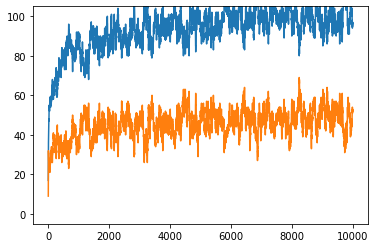

In [165]:
N = 100
media = 25
desvio_padrao = 40

agentes0 = lim.cria_agentes(N,media,desvio_padrao)
agentes1 = lim.cria_agentes(N,media,desvio_padrao)

sistema = Sistema(agentes0, agentes1)

passos_temporais = 10000

(progressao, tamanho_final) = simula_greve_setores_migracao_individual_2(N, sistema, passos_temporais)

plt.figure()
plt.plot(progressao[0])
plt.plot(progressao[1])
plt.ylim(-5,105)
plt.show()